In [1]:
import numpy as np
import pandas as pd

import pytraj as pt
import pyemma

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import glob

In [2]:
rf0=pt.load('./renumber_resid/closed6_dry_rot0.rst7', './renumber_resid/closed6_dry_rot0.parm7')
rf1=pt.load('./renumber_resid/closed6_dry_rot1.rst7', './renumber_resid/closed6_dry_rot1.parm7')
rf2=pt.load('./renumber_resid/closed6_dry_rot2.rst7', './renumber_resid/closed6_dry_rot2.parm7')
rf3=pt.load('./renumber_resid/closed6_dry_rot3.rst7', './renumber_resid/closed6_dry_rot3.parm7')
rf4=pt.load('./renumber_resid/closed6_dry_rot4.rst7', './renumber_resid/closed6_dry_rot4.parm7')
rf5=pt.load('./renumber_resid/closed6_dry_rot5.rst7', './renumber_resid/closed6_dry_rot5.parm7')

rfopen=pt.load('./Trajectories_all/open10_dry.rst7', './Trajectories_all/open10_dry.parm7')

/home/el14718/Software/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
indir = './Trajectories_all'
topfile =  indir+'/closed10_dry.parm7'
from glob import glob
traj_list = sorted(glob(indir+'/*.nc'))
traj_list

['./Trajectories_all/closed2_all_dry_1.nc',
 './Trajectories_all/closed2_all_dry_2.nc',
 './Trajectories_all/closed2_all_dry_3.nc',
 './Trajectories_all/closed2_all_dry_4.nc',
 './Trajectories_all/closed2_all_dry_5.nc',
 './Trajectories_all/closed_all_dry_1.nc',
 './Trajectories_all/closed_all_dry_2.nc',
 './Trajectories_all/closed_all_dry_3.nc',
 './Trajectories_all/closed_all_dry_4.nc',
 './Trajectories_all/closed_all_dry_5.nc',
 './Trajectories_all/open2_all_dry_1.nc',
 './Trajectories_all/open2_all_dry_2.nc',
 './Trajectories_all/open2_all_dry_3.nc',
 './Trajectories_all/open2_all_dry_4.nc',
 './Trajectories_all/open2_all_dry_5.nc',
 './Trajectories_all/open_all_dry_1.nc',
 './Trajectories_all/open_all_dry_2.nc',
 './Trajectories_all/open_all_dry_3.nc',
 './Trajectories_all/open_all_dry_4.nc',
 './Trajectories_all/open_all_dry_5.nc']

In [4]:
# results_open=[]
# results_closed=[]
# for t in traj_list:
#     traj=pt.load(t, topfile)
#     rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
#     rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
#     rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
#     rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
#     rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
#     rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
#     rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
#     results_closed.append(rmsd_closed)
    
#     rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
#     results_open.append(rmsd_open)

In [30]:
results_open=[]
results_closed=[]
results_time_steps=[]
dfs=[]

for t_name in traj_list:
    traj=pt.load(t_name, topfile)
    
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)
    
    time_steps= np.arange(0, traj.n_frames, 1)
    results_time_steps.append(time_steps)
    
    df = pd.DataFrame(rmsd0)
    df.columns = ["rmsd0"]

    df['rmsd1']=rmsd1
    df['rmsd2']=rmsd2
    df['rmsd3']=rmsd3
    df['rmsd4']=rmsd4
    df['rmsd5']=rmsd5
    df['rmsd_closed']=rmsd_closed
    df['rmsd_open']=rmsd_open
    df['time_steps']=time_steps
    
    df['traj_name']=t_name[19:-3]
    df['starting_state']=''.join([i for i in t_name[19:-3].split("_")[0] if not i.isdigit()]) 
    df['run_nb']=t_name[19:-3].split("_")[3]
    df['name']=str(t_name[19:-3].split("_")[0]+"_"+t_name[19:-3].split("_")[3])
        
    dfs.append(df)

df_all=pd.concat(dfs)

In [72]:
results_open

[array([3.29283901, 3.14108136, 3.19064841, ..., 2.76330264, 2.84370592,
        2.72506044]),
 array([3.13509185, 3.10650117, 3.07819168, ..., 2.7729702 , 2.76714067,
        2.62197734]),
 array([3.25235517, 3.23134928, 3.27760033, ..., 2.97678177, 3.1280924 ,
        3.04644166]),
 array([3.10419759, 3.12663696, 3.1910943 , ..., 2.71771592, 2.57244691,
        2.81352801]),
 array([3.08746212, 3.02312029, 3.01729939, ..., 3.18704188, 3.29371238,
        3.39388219]),
 array([3.13268653, 3.32146137, 2.92280455, ..., 2.48997328, 2.54692554,
        2.61030781]),
 array([3.16269599, 3.06483407, 3.08429716, ..., 2.40458756, 2.49881363,
        2.50481145]),
 array([3.10185449, 3.12973388, 3.17938889, ..., 2.55481854, 2.59165449,
        2.55465601]),
 array([3.08432236, 3.0939119 , 3.12914817, ..., 3.2515993 , 3.22318154,
        3.16129724]),
 array([3.31461102, 3.073023  , 3.06413015, ..., 2.45817988, 2.46914564,
        2.53146781]),
 array([1.0570532 , 1.14203178, 1.05489614, ..., 2

In [95]:
Y=[]
for i in range(0,len(results_open)):  
    Z=[]
    for j in range(0,len(results_open[i])):
        a=np.array([results_closed[i][j],results_open[i][j]])
        Z.append(a)
    Z=np.array(Z)
    Y.append(Z)
print(len(Y))
print(len(Y[0]))
print(len(Y[0][0]))

20
10200
2


In [6]:
rmsd_open=np.concatenate(results_open, axis=0)
rmsd_closed=np.concatenate(results_closed, axis=0)

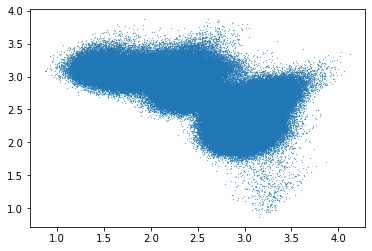

In [7]:
plt.plot(rmsd_closed, rmsd_open, marker=".", ms=0.5, ls='None') 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7334a5f60>)

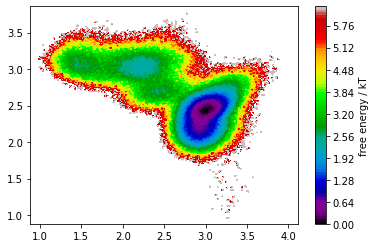

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

pyemma.plots.plot_free_energy(rmsd_closed, rmsd_open, nbins=200, ax=ax)

ax.scatter(x=, y=3.1458, s=5, c='b')
ax.scatter(x=3.1458, y=0.0, s=5, c='r')

ax.set_xlabel('RMSD to closed crystal structure')
ax.set_ylabel('RMSD to open crystal structure')

fig.tight_layout()

In [115]:
n_clusters = 8
clustering = pyemma.coordinates.cluster_kmeans(Y,k=n_clusters, max_iter=1000, n_jobs=1)

In [116]:
clustering.clustercenters

array([[3.2626424, 2.6627097],
       [1.526621 , 3.0928998],
       [2.9643524, 2.5334778],
       ...,
       [2.4714942, 2.864435 ],
       [3.1144226, 2.349581 ],
       [2.8088872, 2.3117115]], dtype=float32)

In [117]:
def plot_labels(ax=None):
    for i in range(0,len(clustering.clustercenters)):
        plt.text(clustering.clustercenters[i][0]+0.06, clustering.clustercenters[i][1]+0.07, 
                 i, fontsize=10, color='black')

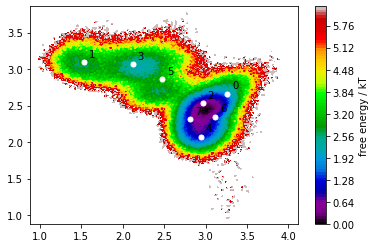

In [118]:
pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1], nbins=200)
cc_x = clustering.clustercenters[:, 0]
cc_y = clustering.clustercenters[:, 1]
plt.plot(cc_x, cc_y, linewidth=0, marker='o', markersize=5, color='white')
plot_labels()

In [119]:
import molpx
import mdtraj as md

In [122]:
indir = './Trajectories_all'
topfile =  indir+'/open10_dry.parm7'
from glob import glob
traj_list = sorted(glob(indir+'/*.nc'))
traj_list

['./Trajectories_all/closed2_all_dry_1.nc',
 './Trajectories_all/closed2_all_dry_2.nc',
 './Trajectories_all/closed2_all_dry_3.nc',
 './Trajectories_all/closed2_all_dry_4.nc',
 './Trajectories_all/closed2_all_dry_5.nc',
 './Trajectories_all/closed_all_dry_1.nc',
 './Trajectories_all/closed_all_dry_2.nc',
 './Trajectories_all/closed_all_dry_3.nc',
 './Trajectories_all/closed_all_dry_4.nc',
 './Trajectories_all/closed_all_dry_5.nc',
 './Trajectories_all/open2_all_dry_1.nc',
 './Trajectories_all/open2_all_dry_2.nc',
 './Trajectories_all/open2_all_dry_3.nc',
 './Trajectories_all/open2_all_dry_4.nc',
 './Trajectories_all/open2_all_dry_5.nc',
 './Trajectories_all/open_all_dry_1.nc',
 './Trajectories_all/open_all_dry_2.nc',
 './Trajectories_all/open_all_dry_3.nc',
 './Trajectories_all/open_all_dry_4.nc',
 './Trajectories_all/open_all_dry_5.nc']

TraitError: Element of the 'children' trait of a MolPXHBox instance must be a Widget, but a value of <matplotlib.backends.backend_agg.FigureCanvasAgg object at 0x7fd73212d128> <class 'matplotlib.backends.backend_agg.FigureCanvasAgg'> was specified.

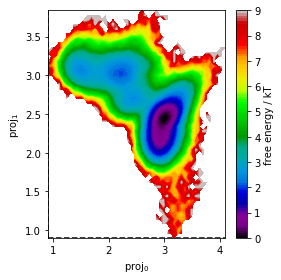

In [124]:
mpx_wdg_box = molpx.visualize.FES(traj_list,
                                 #MD_trajfiles,
                                 topfile,
                                 Y,
                                 #Y,
                                 nbins=50,
                                 #proj_idxs=[1,2],
                                 #proj_labels='RMSD',
                                 #n_overlays=5,
                                )
mpx_wdg_box